In [17]:
# Imports and other custom stuff
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import scipy.stats as stats
import pandas as pd
from os import getcwd

# To compare normal distributions based on mean and variance
def compare_normal_dist(data_row):
    title = data_row['Question']
    x_axis = 'Agreement (1 = Strongly Disagree, 5 = Strongly Agree)'
    y_axis = 'Percent Data Amount'
    class_mean = data_row['Class Average']
    dev_mean = data_row['Paper Average']
    class_var = data_row['Class Variance']
    dev_var = data_row['Paper Variance']
    class_std = np.sqrt(class_var)
    dev_std = np.sqrt(dev_var)
    x = np.linspace(1, 5)
    plt.plot(x, stats.norm.pdf(x, class_mean, class_std), label='Class')
    plt.plot(x, stats.norm.pdf(x, dev_mean, dev_std), label='MS Devs')
    plt.title(title)
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    plt.legend()
    plt.show()

# Conducts a t-test on summary statistics and outputs the result
def conduct_ttest(data_row):
    class_n = 31 # From the mentimeter results (excluding empty rows)
    dev_n = 564 # From the paper
    class_mean = data_row['Class Average']
    dev_mean = data_row['Paper Average']
    class_var = data_row['Class Variance']
    dev_var = data_row['Paper Variance']
    class_std = np.sqrt(class_var)
    dev_std = np.sqrt(dev_var)
    result = stats.ttest_ind_from_stats(class_mean, class_std, class_n, dev_mean, dev_std, dev_n, equal_var=False)
    print("T-Value: %.6f" % result[0])
    print("P-Value: %.6f" % result[1])

## Data Loading

In [18]:
data_path = join(getcwd(), '..', 'data')
statement_data_raw = pd.read_csv(join(data_path, 'beliefs_and_evidence_summary_agreement_dataset.csv'))
sources_data_raw = pd.read_csv(join(data_path, 'beliefs_and_evidence_full_sources_dataset.csv'))

## Data Visualization: Statement Controversy

Agreement for each statement is measured on a 5-point Likert scale (1 = Strongly Disagree, 5 = Strongly Agree).
Below each figure, the mean agreement and the variance (which we use as a proxy for controversy) are given in numerical form.

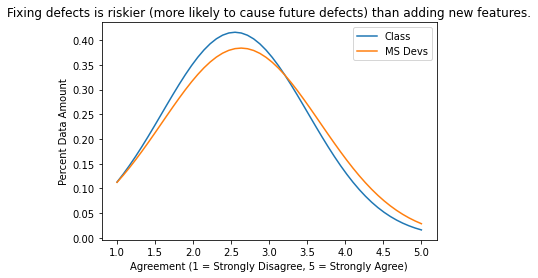

T-Value: -0.450090
P-Value: 0.655503


In [19]:
# We'll have to filter by statement and visualize each one
compare_normal_dist(statement_data_raw.loc[0, : ])
conduct_ttest(statement_data_raw.loc[0, : ])

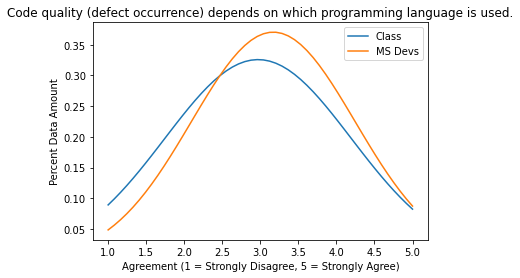

T-Value: -0.890484
P-Value: 0.379731


In [20]:
compare_normal_dist(statement_data_raw.loc[1, : ])
conduct_ttest(statement_data_raw.loc[1, : ])

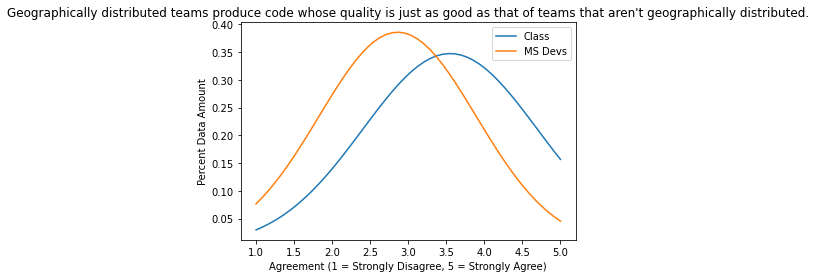

T-Value: 3.271730
P-Value: 0.002523


In [21]:
compare_normal_dist(statement_data_raw.loc[2, : ])
conduct_ttest(statement_data_raw.loc[2, : ])

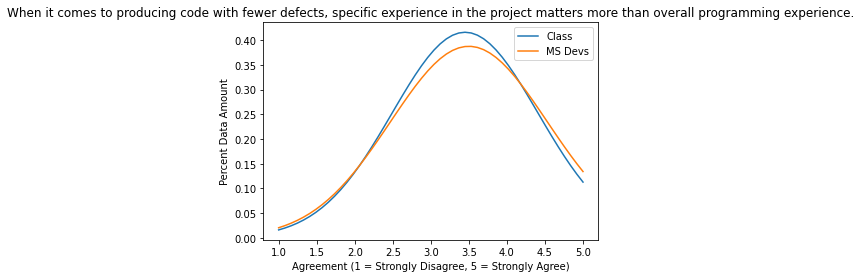

T-Value: -0.281464
P-Value: 0.780065


In [22]:
compare_normal_dist(statement_data_raw.loc[3, : ])
conduct_ttest(statement_data_raw.loc[3, : ])

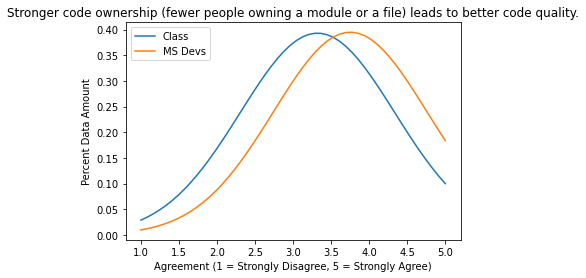

T-Value: -2.297321
P-Value: 0.028009


In [23]:
compare_normal_dist(statement_data_raw.loc[4, : ])
conduct_ttest(statement_data_raw.loc[4, : ])

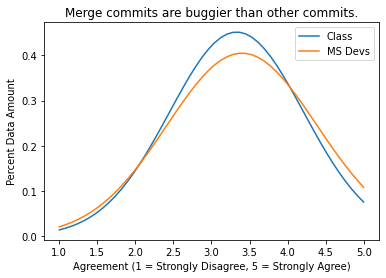

T-Value: -0.426947
P-Value: 0.672091


In [24]:
compare_normal_dist(statement_data_raw.loc[5, : ])
conduct_ttest(statement_data_raw.loc[5, : ])

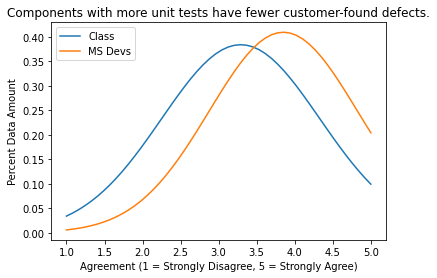

T-Value: -2.930247
P-Value: 0.006108


In [25]:
compare_normal_dist(statement_data_raw.loc[6, : ])
conduct_ttest(statement_data_raw.loc[6, : ])

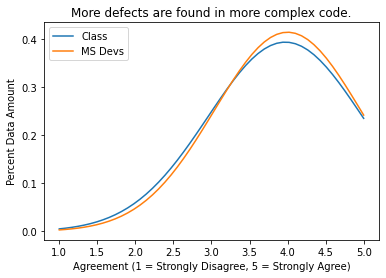

T-Value: -0.160644
P-Value: 0.873351


In [26]:
compare_normal_dist(statement_data_raw.loc[7, : ])
conduct_ttest(statement_data_raw.loc[7, : ])

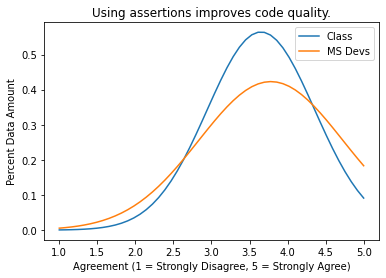

T-Value: -0.976945
P-Value: 0.335091


In [27]:
compare_normal_dist(statement_data_raw.loc[8, : ])
conduct_ttest(statement_data_raw.loc[8, : ])

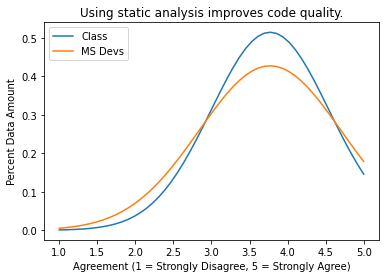

T-Value: 0.000000
P-Value: 1.000000


In [28]:
compare_normal_dist(statement_data_raw.loc[9, : ])
conduct_ttest(statement_data_raw.loc[9, : ])

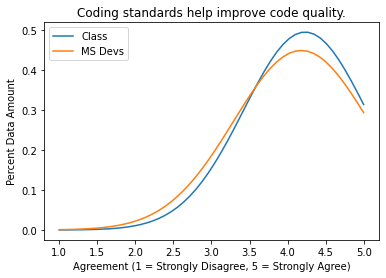

T-Value: 0.334312
P-Value: 0.740190


In [29]:
compare_normal_dist(statement_data_raw.loc[10, : ])
conduct_ttest(statement_data_raw.loc[10, : ])

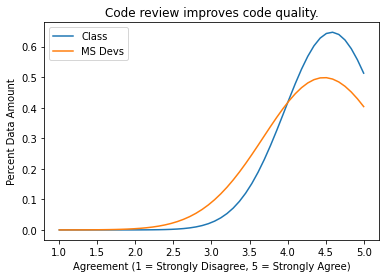

T-Value: 0.864100
P-Value: 0.393287


In [30]:
compare_normal_dist(statement_data_raw.loc[11, : ])
conduct_ttest(statement_data_raw.loc[11, : ])

## Data Visualization: Sources of Information

> In terms of the questions you just answered, which sources of information or knowledge would improve (or improved) your confidence in your answers?

To facilitate comparison with the figure in the paper, I inverted the y-axis (as the authors did) so the higher a source was ranked by respondents, the higher it is placed in the graph.

Unfortunately, since the data from the paper is not available, I cannot reproduce their figure. You will need to compare this figure to the one in the paper.

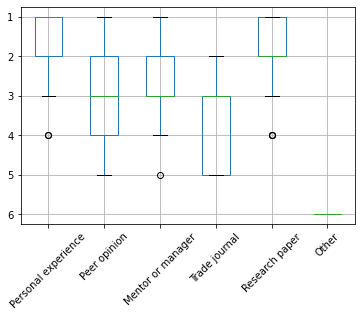

In [31]:
sources_data_raw.boxplot(rot=45)
plt.gca().invert_yaxis()